#Prepration

In [ ]:
!pip install -U scikit-fuzzy
!git clone https://github.com/pyro-ppl/pyro.git
%cd pyro
!python setup.py install
import pyro

from pyro import poutine

from pyro.infer.util import torch_item
from pyro.nn import PyroModule
from pyro.optim import ClippedAdam
from pyro.util import torch_isnan
!git clone https://github.com/joseffaghihi/Causal-probabilistic-fuzzy-logic.git
%cd Causal-probabilistic-fuzzy-logic
import pandas as pd
from source.utils import Score
from source.Fuzzy import Fuzzy
from sklearn.model_selection import train_test_split

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import tensorflow as tf
from __future__ import absolute_import, division, print_function
import sys
import matplotlib.pyplot as plt
import logging
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import torch

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error as mse
from scipy.stats import entropy
import warnings
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


from pyro.contrib.cevae import CEVAE as CEVAEModel


pyro_logger = logging.getLogger("pyro")
pyro_logger.setLevel(logging.DEBUG)
if pyro_logger.handlers:
    pyro_logger.handlers[0].setLevel(logging.DEBUG)




     |████████████████████████████████| 993 kB 1.6 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=d2c731e0369275e4eae0bdf0b66075ccc2fac29ee8b0608715e84c3c150c6dc8
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy
Cloning into 'pyro'...
remote: Enumerating objects: 45095, done.
remote: Counting objects: 100% (3096/3096), done.
remote: Compressing objects: 100% (1492/1492), done.
remote: Total 45095 (delta 1901), reused 2592 (delta 1576), pack-reused 41999
Receiving objects: 100% (45095/45095), 79.15 MiB | 15.98 MiB/s, done.
Resolving deltas: 100% (32166/32166), done.
/content/pyro
running install
running bdist_egg
running egg_info
creating pyro_ppl.egg-info
writing pyro_ppl.egg-info/PKG-INFO
writing dependency_links to pyro_ppl.egg-info/dependency_links.txt
writing requirements to pyro_ppl.egg-info/requires.txt
writing top-level names to pyro_

#Fuzzification then appling UBER CEVAE. Low y_factual

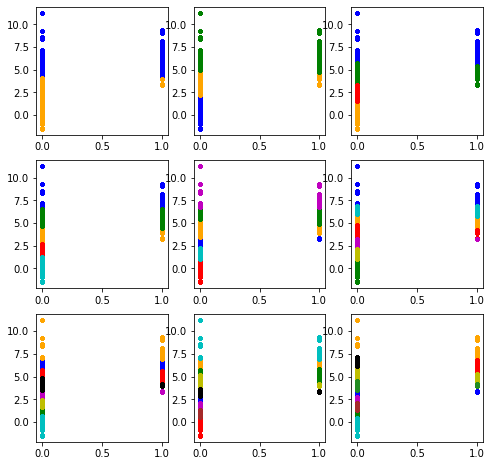

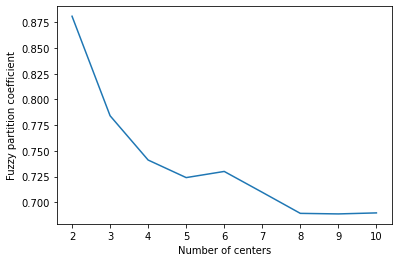

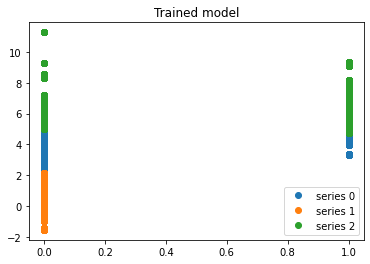

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv', header = None)
df.dataframeName = 'data'
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
df.columns = cols
df = pd.concat([df]*100, ignore_index=True)
#precising variables type
binfeats = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]
contfeats = [i for i in range(25) if i not in binfeats]
perm = binfeats + contfeats
df = df.reset_index(drop=True)
X = df[perm].values
treatment = df['treatment'].values
y = df['y_factual'].values
y_cf = df['y_cfactual'].values
tau = df.apply(lambda y: y['y_factual'] - y['y_cfactual'] if y['treatment']==1
               else y['y_cfactual'] - y['y_factual'],
               axis=1)
mu_0 = df['mu0'].values
mu_1 = df['mu1'].values

# train and test
itr, ite = train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=1)
X_train, treatment_train, y_train, y_cf_train, tau_train, mu_0_train, mu_1_train = X[itr], treatment[itr], y[itr], y_cf[itr], tau[itr], mu_0[itr], mu_1[itr]
X_val, treatment_val, y_val, y_cf_val, tau_val, mu_0_val, mu_1_val = X[ite], treatment[ite], y[ite], y_cf[ite], tau[ite], mu_0[ite], mu_1[ite]

m=min(len(y_val),len(y_train))

test=Fuzzy()
new=test.fuzzify(df,[1,2],0,1)

In [ ]:
df1=new.copy()
df1_low=df1.drop(['y_factual_low', 'y_factual_high', 'y_cfactual_low', 'y_cfactual_high'], axis=1 )
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
df1_low.columns=cols
df1_low['y_factual']=df1_low['y_factual']
df1_low['y_cfactual']=df1_low['y_cfactual']


In [ ]:
# main block 
df= pd.read_csv('https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv', header = None)
df.dataframeName = 'data'
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
df.columns = cols
df = pd.concat([df]*100, ignore_index=True)
df2=df.copy()
df2['y_factual']=df2['y_factual']*df1['y_factual_low']
df2['y_cfactual']=df2['y_cfactual']*df1['y_cfactual_low']


INFO:numexpr.utils:NumExpr defaulting to 2 threads.


In [ ]:
df1=new.copy()
df1_low=df1.drop(['y_factual_low', 'y_factual_high', 'y_cfactual_low', 'y_cfactual_high'], axis=1 )
cols =  ["treatment", "y_factual", "y_cfactual", "mu0", "mu1"] + [i for i in range(25)]
df1_low.columns=cols
df1_low['y_factual']=df1_low['y_factual']
df1_low['y_cfactual']=df1_low['y_cfactual']

df2=df.copy()
df2['y_factual']=df2['y_factual']+df1['y_factual_low']
df2['y_cfactual']=df2['y_cfactual']+df1['y_cfactual_low']
df_low=df2.copy()
X = df_low[perm].values
treatment = df_low['treatment'].values
y = df_low['y_factual'].values
y_cf = df_low['y_cfactual'].values
tau = df_low.apply(lambda y: y['y_factual'] - y['y_cfactual'] if y['treatment']==1
               else y['y_cfactual'] - y['y_factual'],
               axis=1).reset_index()
tau=tau[0]               
mu_0 = df['mu0'].values
mu_1 = df['mu1'].values


def pdr(*args):
    output = [i.to_numpy() if hasattr(i, "to_numpy") else i for i in args]
    return output if len(output) > 1 else output[0]   
    
# train and test
itr, ite = train_test_split(np.arange(X.shape[0]), test_size=0.2, random_state=1)
X_train, treatment_train, y_train, y_cf_train, tau_train, mu_0_train, mu_1_train = X[itr], treatment[itr], y[itr], y_cf[itr], tau[itr], mu_0[itr], mu_1[itr]
X_val, treatment_val, y_val, y_cf_val, tau_val, mu_0_val, mu_1_val = X[ite], treatment[ite], y[ite], y_cf[ite], tau[ite], mu_0[ite], mu_1[ite]


m=min(len(y_val),len(y_train))


# model settings
outcome_dist = "normal"
latent_dim = 20
hidden_dim = 300
num_epochs = 5
batch_size = 1000
learning_rate = 0.001
learning_rate_decay = 0.01
num_layers =2

In [ ]:
class CEVAE:
    def __init__(self, outcome_dist="studentt", latent_dim=20, hidden_dim=200, num_epochs=50, num_layers=3,
                 batch_size=100, learning_rate=1e-3, learning_rate_decay=0.1, num_samples=1000, weight_decay=1e-4):
        """
        Initializes CEVAE.
            Args:
                outcome_dist (str): Outcome distribution as one of: "bernoulli" , "exponential", "laplace", "normal",
                                    and "studentt"
                latent_dim (int) : Dimension of the latent variable
                hidden_dim (int) : Dimension of hidden layers of fully connected networks
                num_epochs (int): Number of training epochs
                num_layers (int): Number of hidden layers in fully connected networks
                batch_size (int): Batch size
                learning_rate (int): Learning rate
                learning_rate_decay (float/int): Learning rate decay over all epochs; the per-step decay rate will
                                                 depend on batch size and number of epochs such that the initial
                                                 learning rate will be learning_rate and the
                                                 final learning rate will be learning_rate * learning_rate_decay
                num_samples (int) : Number of samples to calculate ITE
                weight_decay (float) : Weight decay
        """
        self.outcome_dist = outcome_dist
        self.latent_dim = latent_dim
        self.hidden_dim = hidden_dim
        self.num_epochs = num_epochs
        self.num_layers = num_layers
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.learning_rate_decay = learning_rate_decay
        self.num_samples = num_samples
        self.weight_decay = weight_decay

    def fit(self, X, treatment, y, p=None):
        """
        Fits CEVAE.
        Args:
            X (np.matrix or np.array or pd.Dataframe): a feature matrix
            treatment (np.array or pd.Series): a treatment vector
            y (np.array or pd.Series): an outcome vector
        """
        X, treatment, y = pdr(X, treatment, y)

        self.cevae = CEVAEModel(outcome_dist=self.outcome_dist,
                           feature_dim=X.shape[-1],
                           latent_dim=self.latent_dim,
                           hidden_dim=self.hidden_dim,
                           num_layers=self.num_layers)

        self.cevae.fit(x=torch.tensor(X, dtype=torch.float),
                       t=torch.tensor(treatment, dtype=torch.float),
                       y=torch.tensor(y, dtype=torch.float),
                       num_epochs=self.num_epochs,
                       batch_size=self.batch_size,
                       learning_rate=self.learning_rate,
                       learning_rate_decay=self.learning_rate_decay,
                       weight_decay=self.weight_decay)

    def predict(self, X, treatment=None, y=None, p=None):
        """
        Calls predict on fitted DragonNet.
        Args:
            X (np.matrix or np.array or pd.Dataframe): a feature matrix
        Returns:
            (np.ndarray): Predictions of treatment effects.
        """
        return self.cevae.ite(torch.tensor(X, dtype=torch.float),
                              num_samples=self.num_samples,
                              batch_size=self.batch_size).cpu().numpy()

    def fit_predict(self, X, treatment, y, p=None):
        """
        Fits the CEVAE model and then predicts.
        Args:
            X (np.matrix or np.array or pd.Dataframe): a feature matrix
            treatment (np.array or pd.Series): a treatment vector
            y (np.array or pd.Series): an outcome vector
        Returns:
            (np.ndarray): Predictions of treatment effects.
        """
        self.fit(X, treatment, y)
        return self.predict(X)

# from  model import CEVAE
cevae_model = CEVAE(outcome_dist=outcome_dist,
              latent_dim=latent_dim,
              hidden_dim=hidden_dim,
              num_epochs=num_epochs,
              batch_size=batch_size,
              learning_rate=learning_rate,
              learning_rate_decay=learning_rate_decay,
              num_layers=num_layers)        

# fit
losses = cevae_model.fit(X=torch.tensor(X_train, dtype=torch.float),
                   treatment=torch.tensor(treatment_train, dtype=torch.float),
                   y=torch.tensor(y_train, dtype=torch.float))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
INFO 	 Training with 60 minibatches per epoch
DEBUG 	 step     0 loss = 85.8904
DEBUG 	 step   100 loss = 26.4912
DEBUG 	 step   200 loss = 22.9508


In [ ]:
#train 
ite_train = cevae_model.predict(X_train)
ite_val = cevae_model.predict(X_val)

INFO 	 Evaluating 60 minibatches
DEBUG 	 batch ate = 3.58157
DEBUG 	 batch ate = 3.58364
DEBUG 	 batch ate = 3.58081
DEBUG 	 batch ate = 3.57306
DEBUG 	 batch ate = 3.58304
DEBUG 	 batch ate = 3.57869
DEBUG 	 batch ate = 3.5838
DEBUG 	 batch ate = 3.5751
DEBUG 	 batch ate = 3.57392
DEBUG 	 batch ate = 3.59054
DEBUG 	 batch ate = 3.55725
DEBUG 	 batch ate = 3.55441
DEBUG 	 batch ate = 3.59036
DEBUG 	 batch ate = 3.59075
DEBUG 	 batch ate = 3.56828
DEBUG 	 batch ate = 3.58451
DEBUG 	 batch ate = 3.565
DEBUG 	 batch ate = 3.57284
DEBUG 	 batch ate = 3.57982
DEBUG 	 batch ate = 3.5892
DEBUG 	 batch ate = 3.58994
DEBUG 	 batch ate = 3.56314
DEBUG 	 batch ate = 3.58628
DEBUG 	 batch ate = 3.57517
DEBUG 	 batch ate = 3.59099
DEBUG 	 batch ate = 3.58143
DEBUG 	 batch ate = 3.56136
DEBUG 	 batch ate = 3.59377
DEBUG 	 batch ate = 3.57569
DEBUG 	 batch ate = 3.59121
DEBUG 	 batch ate = 3.56621
DEBUG 	 batch ate = 3.5813
DEBUG 	 batch ate = 3.58286
DEBUG 	 batch ate = 3.56135
DEBUG 	 batch ate = 3